# Building Image Classifier - Keras and Tenserflow

### Programming Practice Assignment
##### Practice Assignment: MNIST Digit classification

 - This assignment will help you practice the concepts you are learning side-by-side. For this assignment, we will be working on the MNIST database. The MNIST data is a database of handwritten digits from 0 to 9. The database contains 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. Your task is to create an ANN model for identifying the digit from the handwritten images.

##### Please perform the following tasks:

- Load the database to variable named digit_mnist using the Keras inbuilt datasets (digit_mnist = keras.datasets.mnist)
- Import data to create X_train_full, y_train_full, X_test and y_test variables
- Normalize the data
- Create a validation set of 6000 images
- Create an ANN model with two dense layers of 200 and 100 neurons
- Compile and train the model for 60 epochs
- Plot the loss and accuracy against epoch
- Evaluate the model accuracy on the test dataset
- Predict the digit for the first 5 records of the test dataset

In [39]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
import tensorflow as tf

In [41]:
print(tf.__version__)

2.5.0


In [42]:
from tensorflow import keras

In [43]:
print(keras.__version__)

2.5.0


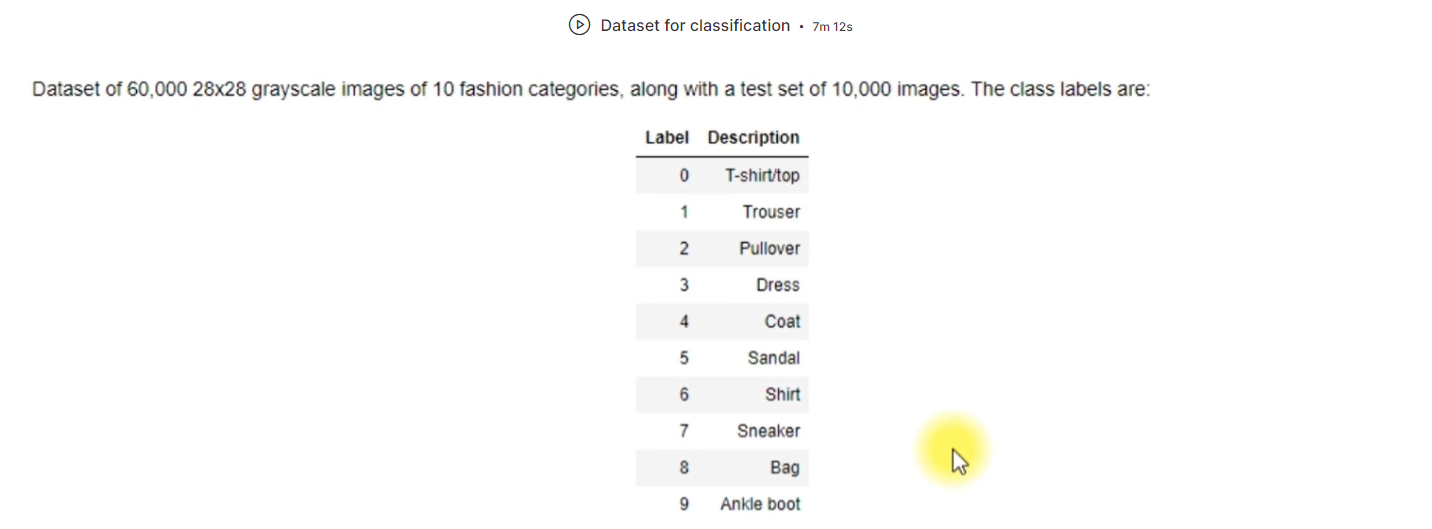

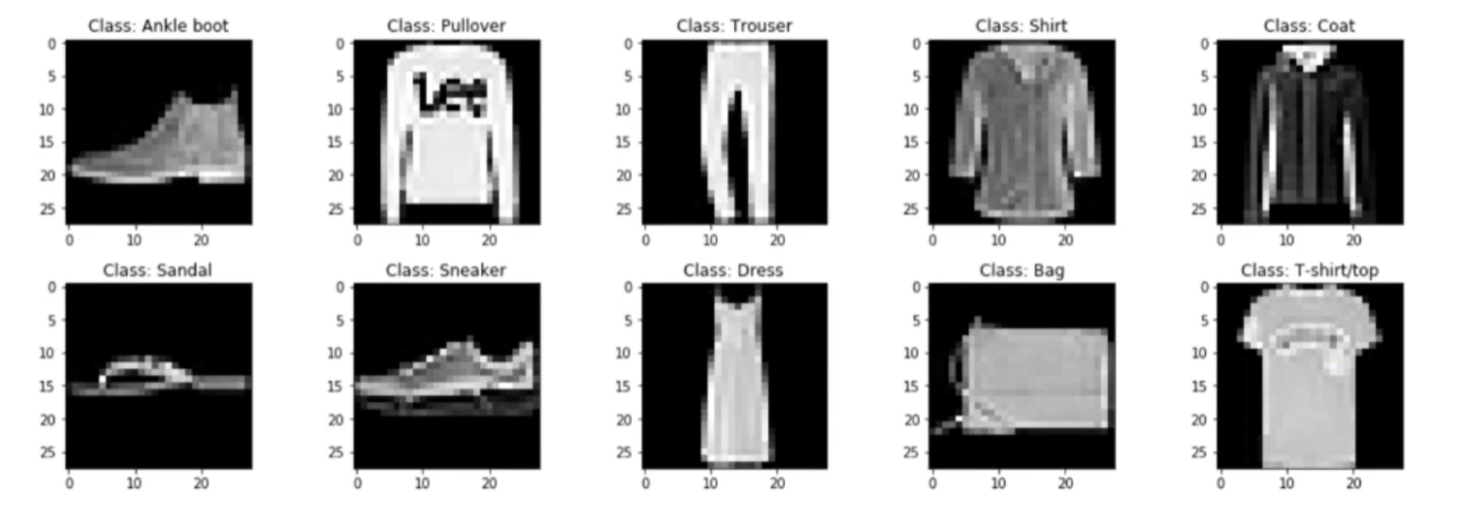

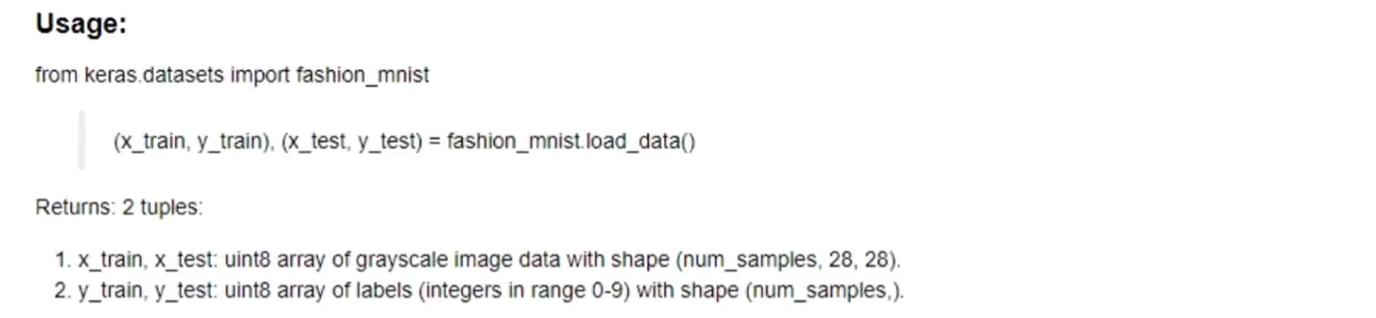

In [44]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

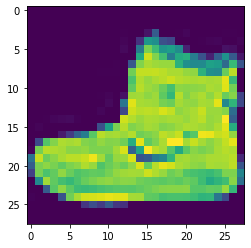

In [45]:
plt.imshow(X_train[0])

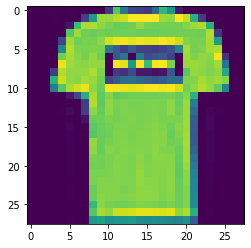

In [46]:
plt.imshow(X_train[1])

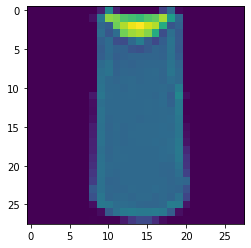

In [47]:
plt.imshow(X_train[2])

In [48]:
y_train[0], y_train[1], y_train[2]

(9, 0, 0)

In [49]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [50]:
class_names[y_train[0]]

'Ankle boot'

In [51]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [52]:
# images are in 28x28 greyscale format so 
# X_train[0] -> showing 28x28 pixel values
# therefore 28 pixels in each row.
# Total rows =  28
# 0 pixel = pure black
# 255 pixel =  white
# for each image we have 28x28 pixels i.e. 784 values and using these values will predicting the description of image

In [53]:
# x varriable is present in form of 2-D array
# of 28x28 pixel intensities
# where each pixel intensity lies between 0 to 255

# will be using Gradient Descent to compile the Model, need to Normalize this pixel intensities
# here normalizing means --> restrict the pixels intensities between 0 and 1
# therefore divide all pixel intensities with total instensity

### Data Normalization

In [54]:
X_train_new = X_train / 255.
X_test_new = X_test / 255.

In [55]:
X_train_new[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [56]:
# dividing by 255. not by 255 because --> we need final output in form of floating numbers between 0 and 1

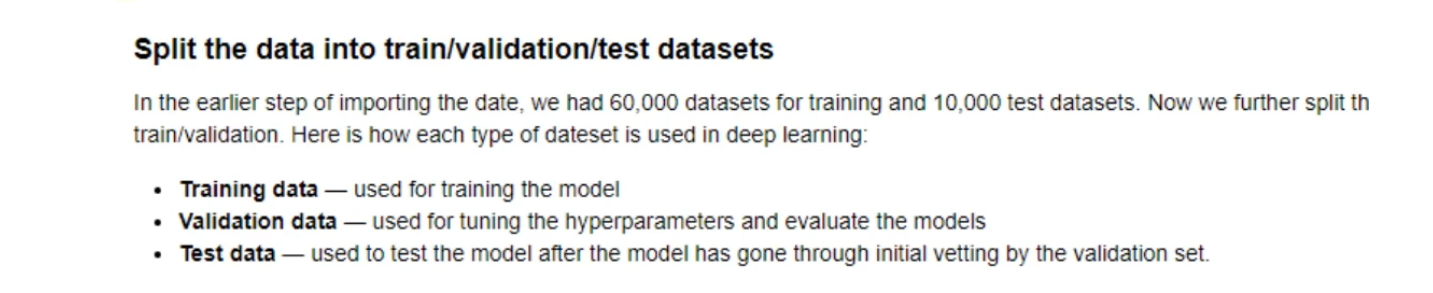

In [57]:
X_valid, X_train = X_train_new[:5000], X_train_new[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test_new

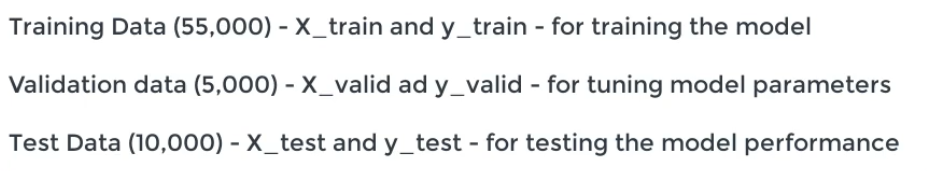

# Model Creation

2 APIs for defining a model in Keras
   - Sequential model API - simple straight forward model
       - useful for creating layer by layer models such as Feed forward network (fully connected network) - 5341 network
       - 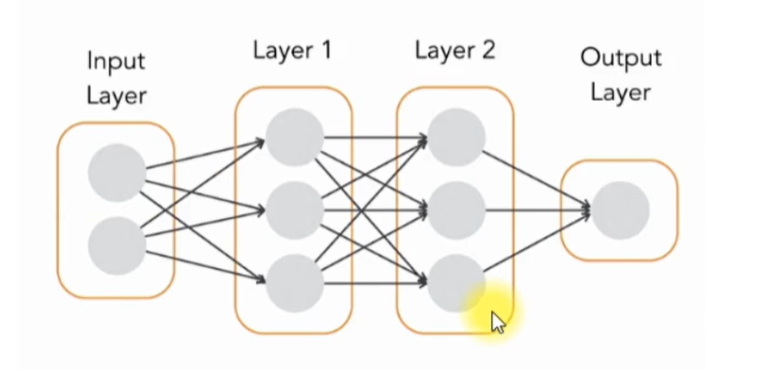
       
   - Functional API - complex but flexible
       - but for some advanced and complex structure such as:
       -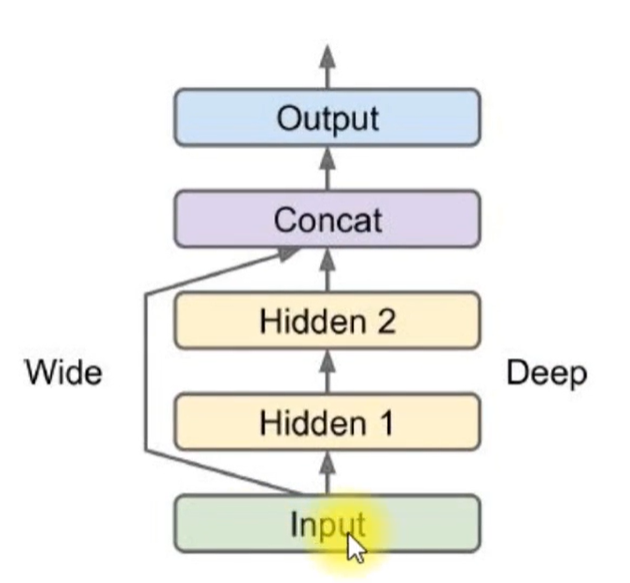
       - input as input for concat layer as well
       - concat layer will have one as primary input and another as output of hidden layers as well

# First structure of ANN

In [58]:
# random.seed is used to replicate the same result everytime
np.random.seed(42)
tf.random.set_seed(42)

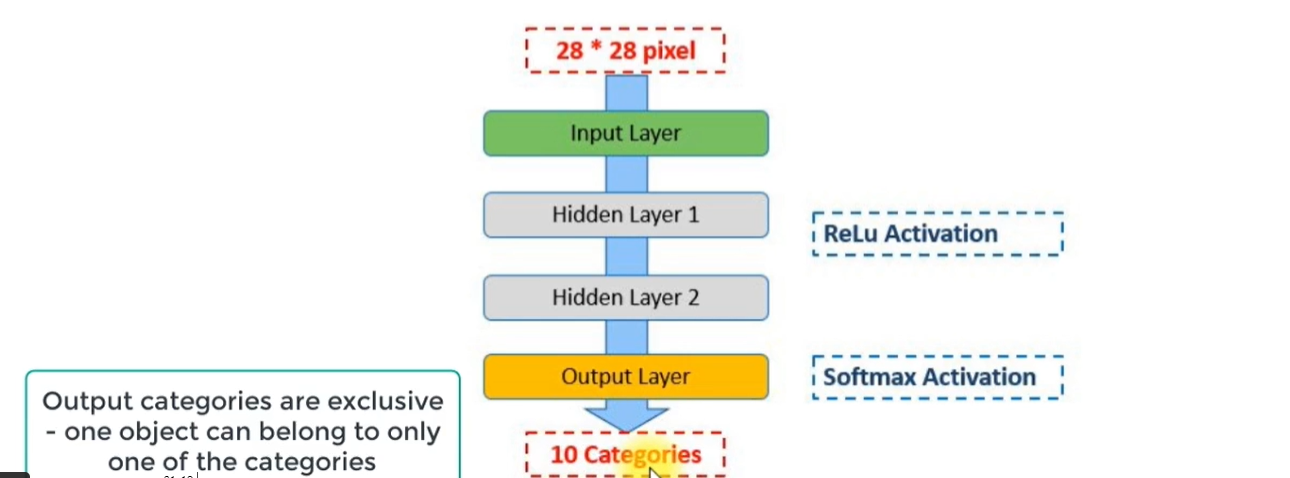

In [59]:
# converting 2D observation (28x28) into flat 1D observations
# 784 pixel in input layer
# ReLU Activation Function to be used in 2 Hidden layers
# Softmax Activation Function in output layer

### Sequential API

In [60]:
model = keras.models.Sequential()
# this is the sequential object in which can add different layers
# start with input layer then hidden layer 1 then hidden layer 2 and lastly output layer

# input layer
model.add(keras.layers.Flatten(input_shape=[28,28]))
# hidden layer 1 also called Dense Layer- 300 neurons- pyramid method
model.add(keras.layers.Dense(300, activation='relu'))
# hidden layer 2 also called Dense Layer- 100 neurons- pyramid method
model.add(keras.layers.Dense(100, activation='relu'))
# output layer , neurons=nof of categories we want to predict hence 10
model.add(keras.layers.Dense(10, activation='softmax'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 784*300 + 300 = 235500 ; wx +b =z
# 300*100 + 100 = 30100 ; wx +b =z
# 100*10 + 10 = 1010 ; wx +b =z

In [63]:
# pip install pydot

# ('You must install pydot (`pip install pydot`) and install graphviz 
# (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')

In [64]:
# pip install pydotplus

In [65]:
# pip install graphviz

In [66]:
#pip install pydot-ng

In [67]:
# conda install python-graphviz

In [68]:
# import graphviz

In [69]:
# structure of neural network just created above

#import pydot
#keras.utils.plot_model(model)

#  or ----------

#from tensorflow.keras.utils import plot_model
#plot_model(model)

In [70]:
# pip install ann_visualizer

In [71]:
#or
#from ann_visualizer.visualize import ann_viz

#ann_viz(model, title="My first neural network")

In [72]:
model.layers

In [73]:
model.layers[0]

### to find out the randomly assigned weights and bias

In [74]:
weights, biases = model.layers[1].get_weights()

In [75]:
weights   # 784*300 weights for hidden layer 1

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [76]:
weights.shape

(784, 300)

In [77]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [78]:
biases.shape

(300,)

# Why Random Seeding is Done ?
### Solution :
 - to produce same set of random values
 - for example: if 'x' generating random value between 1 to 10 and 'y' doing the same it is highly unlikely that value came out will be same.
 - 'x' can get 2 as result and 'y' can get 7 as a result
 - random values may also get change while re-exicuting the code, so if in first turn 'x' getting 2 then in second rerun of code 'x' can get random value of 8
 - random seed ensures will get same set of random values, even if the code is re-running


## Random Seed

In [79]:
# numpy array of 5 random numbers
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [80]:
np.random.rand(5)

array([0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [81]:
np.random.rand(5)

array([0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497])

In [82]:
# now will set a seed of 42
np.random.seed(42)

In [83]:
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [84]:
np.random.rand(5)

array([0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [85]:
# now will set a seed of 42
# to set first random 5 numbers 
np.random.seed(42)

In [86]:
np.random.rand(5)

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [87]:
# after setting the seed will get same set of random numbers

In [88]:
np.random.rand(5)

array([0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

In [89]:
# when changing the seed from 42 to 82
np.random.seed(82)

In [90]:
np.random.rand(5)

array([0.27522567, 0.63923076, 0.62389921, 0.77804231, 0.47811353])

In [91]:
np.random.rand(5)

array([0.95913389, 0.99743421, 0.83251328, 0.20384505, 0.13405   ])

### what is the use of generating same set of random numbers, how this will impact the model building process ?

 - model building process has several occasions where we are using random numbers:
 - there are 2 common task:
     - test and train split
          - python or any other programming language just dont pick starting 80% of data in train and rest 20% in test set.
          - rather test-train-split function uses random numbers to randomly divide data to test and train
          - so each observation has an opportunity to go into either test or train set
          - randomly divided data ensures comparable test and train dataset, sometimes initial data may be ordered
          - example:
                  - labeling photos of cats and dogs using a model there may be case where the first 1000 images are of cats and the next 1000 images are of dogs ; in such cases ---> picking first 80% as training and rest 20% as test will result in uneven datasets. That's why it is important to randomly assign each observation into either test or train.
          - random numbers differe from machine to machine
          - so of test and train datasets are different will never get same result, running the same code will give me a different accuracy value because of the difference in the data. This will create a lot of confusion and uncertanity
          - to avoid this `random.seed` is used.
          - giving random seed will always generate the same set of random numbers. so if running same code on 2 different machines giving random seed will result in same test-train-split and dataset will remain same so same performance matrix.
          - thats why random seed is important before test-train-split

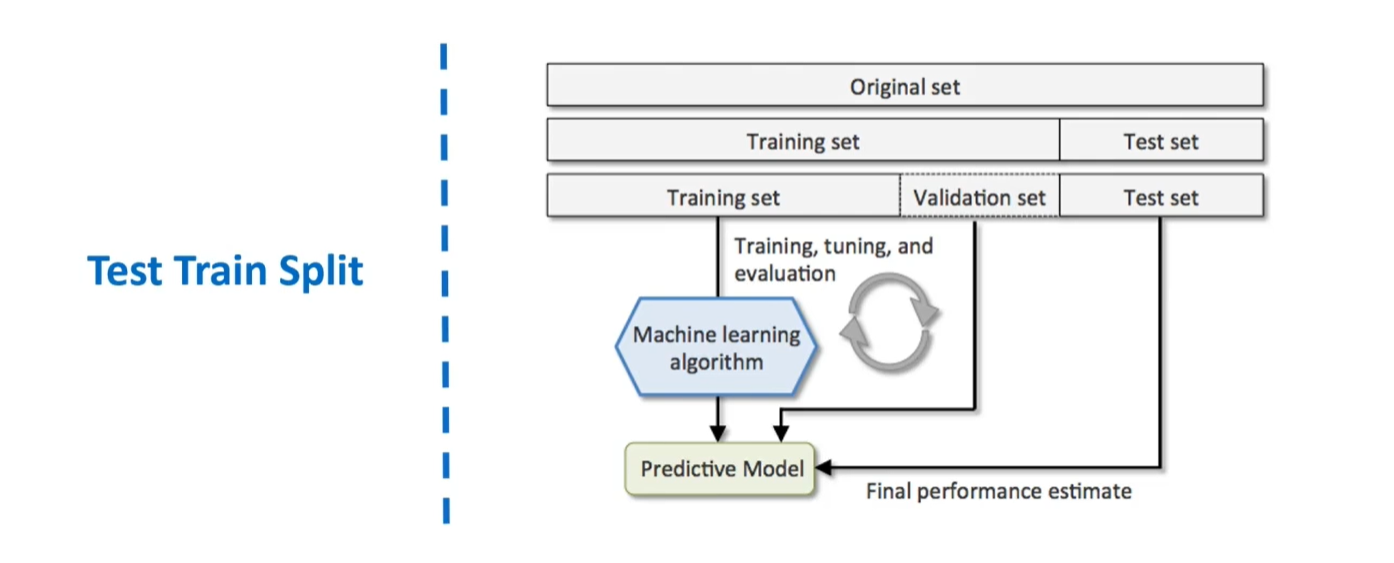

    - model training 
    
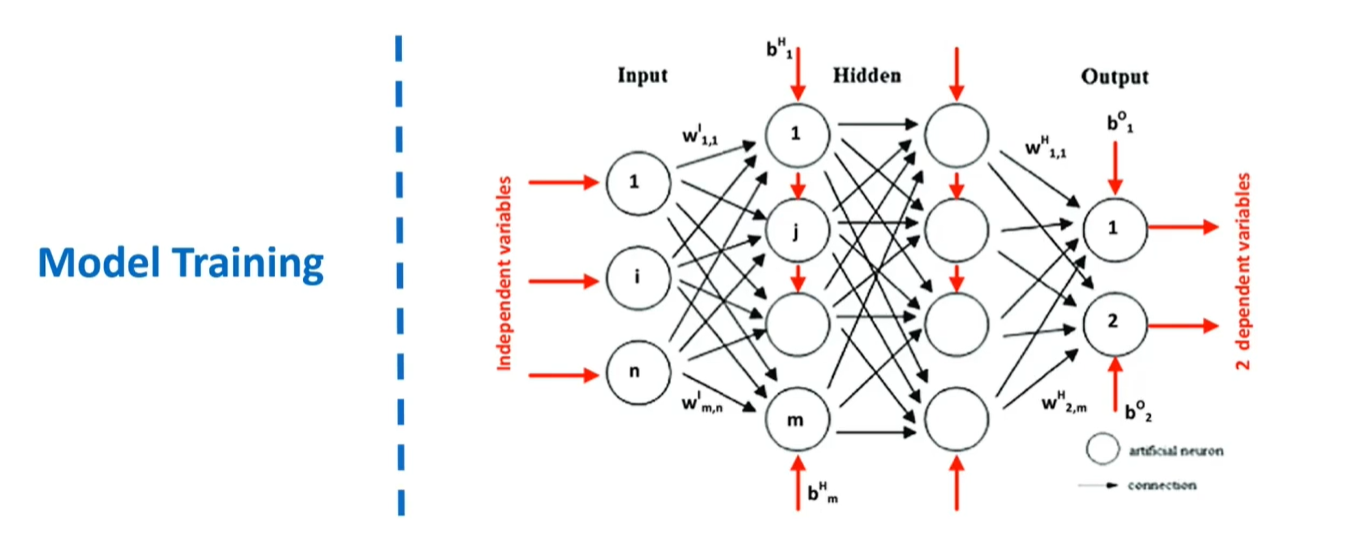

       - in many algorithms we need random numbers to execute that algorithm
       - for example:
             - ANN : Need random numbers to initialize weights and biases. first vales of [w and b] are given randomly
             - Random Forest :  randomly select few factors and observations randomly to create individual trees later we combine these trees to create a final Random Forest
             - without havinf random seed in model training will result in different output for the same code

# Compiling and Training the NN Model

https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class

In [92]:
# compile method will give loss function, optimizer and metrics that we eant to calculate
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
# sgd = stochastic gradient descent to perform backpropagation algorithm 
# loss =  cross entropy error function = sparse_categorical becuase 'y' data is available in labels

In [93]:
model_history = model.fit(X_train,y_train, epochs=30, validation_data = (X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 2ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5330 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8569 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8619 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3707 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3633 - accuracy: 0.8714 - val_loss: 0.3627 - val_accuracy:

In [94]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [95]:
model_history.history

{'loss': [0.7236780524253845,
  0.4843233525753021,
  0.43925395607948303,
  0.41249433159828186,
  0.39395850896835327,
  0.37522026896476746,
  0.36334460973739624,
  0.35189977288246155,
  0.3415890038013458,
  0.33219200372695923,
  0.32431620359420776,
  0.31506234407424927,
  0.30816128849983215,
  0.3023137152194977,
  0.29484379291534424,
  0.289277583360672,
  0.2841065526008606,
  0.277920126914978,
  0.27297961711883545,
  0.26764771342277527,
  0.26259559392929077,
  0.2577607333660126,
  0.253675252199173,
  0.24865274131298065,
  0.24440625309944153,
  0.24075055122375488,
  0.23647968471050262,
  0.23291146755218506,
  0.22853097319602966,
  0.22528870403766632],
 'accuracy': [0.7644181847572327,
  0.8317636251449585,
  0.8453817963600159,
  0.8568727374076843,
  0.8618909120559692,
  0.8673818111419678,
  0.871399998664856,
  0.875,
  0.8785272836685181,
  0.8825091123580933,
  0.8830181956291199,
  0.8867999911308289,
  0.889018177986145,
  0.8916181921958923,
  0.8939

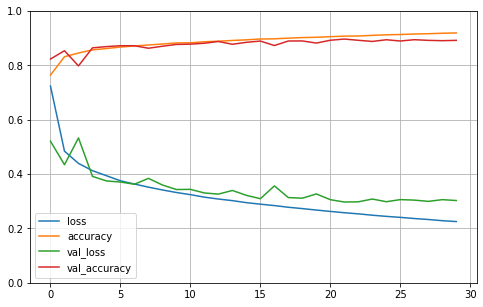

In [96]:
# how accuracy score is changing with each epoch

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [97]:
# currently the values of validation accuracy is increasing and validation loss is decreasing with number of epochs
# hence we should try with more epochs

# Evaluate performance of model

In [98]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8834


[0.3360535800457001, 0.883400022983551]

In [99]:
# loss = 0.3360535800457001
# accuracy = 0.883400022983551

# Predict Classes/Probabilities on new unseen data

In [100]:
# as of now dont have any unseend data hence taking first 3 from test dataset
X_new = X_test[:3]

In [101]:
# probability of each class
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

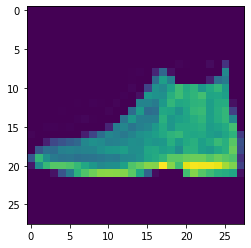

In [103]:
# the above shows 3 records each consisting 10 fashion items and there probabilities as compared to the grey scale 
# image in X_new

plt.imshow(X_new[0])

In [104]:
# predicting class
y_pred = model.predict_classes(X_new)
y_pred

C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [105]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

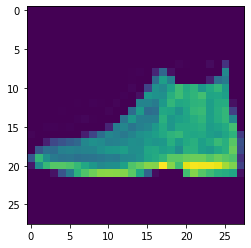

In [106]:
plt.imshow(X_new[0])

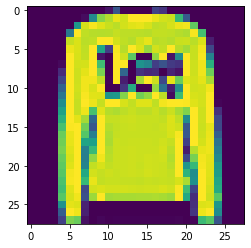

In [107]:
plt.imshow(X_new[1])

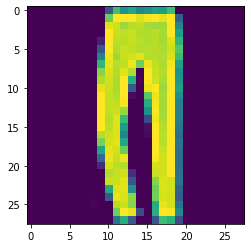

In [108]:
plt.imshow(X_new[2])

# Steps we performed above

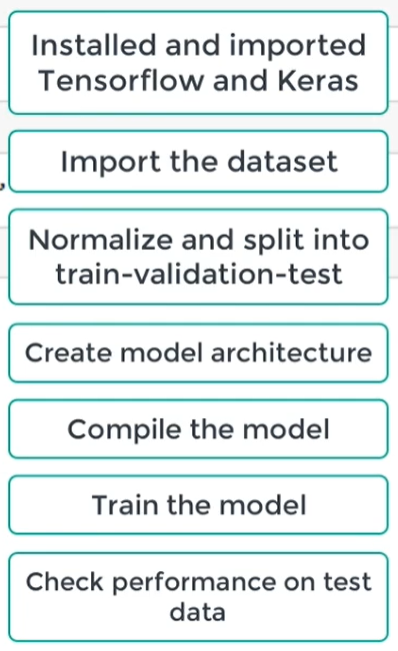